# Sider Multitask Classifier

# Baseline 

In [39]:
import numpy as np
import tensorflow as tf
import deepchem as dc

In [40]:
sider_tasks, sider_datasets, transformers = dc.molnet.load_sider(featurizer = 'GraphConv')
train_dataset, valid_dataset, test_dataset = sider_datasets

Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.


In [41]:
sider_datasets

(<deepchem.data.datasets.DiskDataset at 0x7f4f085cb080>,
 <deepchem.data.datasets.DiskDataset at 0x7f4fb0066748>)

In [42]:
train_dataset.y.shape

(1141, 27)

In [8]:
valid_dataset.y.shape

(143, 27)

In [9]:
test_dataset.y.shape

(143, 27)

In [10]:
featurizer = dc.feat.CircularFingerprint(size = 1024)

In [11]:
loader = dc.data.CSVLoader(
      tasks=sider_tasks, smiles_field="smiles",
      featurizer=featurizer)

In [12]:
dataset = loader.featurize('sider.csv')

Loading raw samples now.
shard_size: 8192
About to start loading CSV from sider.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
TIMING: featurizing shard 0 took 1.878 s
TIMING: dataset construction took 1.928 s
Loading dataset from disk.


In [13]:
sider_tasks

['Hepatobiliary disorders',
 'Metabolism and nutrition disorders',
 'Product issues',
 'Eye disorders',
 'Investigations',
 'Musculoskeletal and connective tissue disorders',
 'Gastrointestinal disorders',
 'Social circumstances',
 'Immune system disorders',
 'Reproductive system and breast disorders',
 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)',
 'General disorders and administration site conditions',
 'Endocrine disorders',
 'Surgical and medical procedures',
 'Vascular disorders',
 'Blood and lymphatic system disorders',
 'Skin and subcutaneous tissue disorders',
 'Congenital, familial and genetic disorders',
 'Infections and infestations',
 'Respiratory, thoracic and mediastinal disorders',
 'Psychiatric disorders',
 'Renal and urinary disorders',
 'Pregnancy, puerperium and perinatal conditions',
 'Ear and labyrinth disorders',
 'Cardiac disorders',
 'Nervous system disorders',
 'Injury, poisoning and procedural complications']

In [14]:
splitter = dc.splits.RandomSplitter('sider.csv')
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset)
#NOTE THE RENAMING:
valid_dataset, test_dataset = test_dataset, valid_dataset


Computing train/valid/test indices
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.023 s
Loading dataset from disk.
TIMING: dataset construction took 0.025 s
Loading dataset from disk.


In [15]:
n_features = train_dataset.get_data_shape()[0]

In [16]:
params_dict = {"activation": ["relu"],
               "optimizer": ["Adam"],
               "momentum": [.9],
               "penalty": [0.]
              }

n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
    model = dc.models.MultitaskClassifier(
    len(sider_tasks), n_features, **model_params)
    return model

In [17]:

metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)
optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_hyperparams, all_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, [], metric)

Fitting model 1/1
hyperparameters: {'activation': 'relu', 'optimizer': 'Adam', 'momentum': 0.9, 'penalty': 0.0}
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


computed_metrics: [0.7574334898278561, 0.6680810938236681, 0.8591549295774648, 0.6835699797160243, 0.6850756081525312, 0.6422743498215195, 0.7332677165354331, 0.667016806722689, 0.6227810650887575, 0.7349019607843137, 0.6985968699406369, 0.6367684478371503, 0.7220205686630368, 0.5483996877439501, 0.6637884511602806, 0.6639412997903564, 0.6398496240601503, 0.5570999248685199, 0.706766917293233, 0.6723610402855686, 0.7037203047960556, 0.6567520625271385, 0.6361323155216285, 0.6027397260273972, 0.646845694799659, 0.729235880398671, 0.5457194083370686]
Model 1/1, Metric mean-roc_auc_score, Validation set 0: 0.669789
	best_validation_score so far: 0.669789
computed_metrics: [0.9178287620139698, 0.9154011716112922, 0.9154546354012071, 0.9134219009475432, 0.9366761754869172, 0.9082591600414793, 0.9684436574246189, 0.9226579978362934, 0.9117930259749192, 0.9280192375106858, 0.9270714110933074, 0.9680947537926943, 0.9289264682046572, 0.9338337967253629, 0.9325831009604744, 0.9240337692758149, 0

In [18]:
best_dnn

MultitaskClassifier(activation_fns=None, bias_init_consts=None, dropouts=None,
                    layer_sizes=None, n_classes=2, n_features=1024, n_tasks=27,
                    weight_decay_penalty=None, weight_decay_penalty_type=None,
                    weight_init_stddevs=None)

In [19]:
best_hyperparams

('relu', 'Adam', 0.9, 0.0)

In [20]:
all_results

{"('relu', 'Adam', 0.9, 0.0)": 0.6697887120037317}

In [21]:
model=model_builder(params_dict,params_dict)
model.fit(train_dataset, nb_epoch=100)

142.26870628850378

In [22]:
obj=best_dnn.fit(train_dataset,**params_dict,epochs=100)

In [23]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)

In [24]:
train_scores = model.evaluate(train_dataset, [metric], transformers)

computed_metrics: [0.9998258398219559, 0.9998820403748576, 1.0, 0.9999837191885643, 0.9999016328939603, 0.999913584514345, 0.9998581407634962, 0.9984244855945467, 0.9999503274566894, 0.9999784746523657, 0.9992718389126127, 0.9999788117637087, 0.9999909953716211, 0.9999073215940686, 0.9998340193865356, 0.9999560804216279, 0.999907658212263, 0.9996221596831353, 0.999932853751842, 0.9999698145405371, 0.9999542365512666, 0.9997617582243046, 0.9975888568683957, 0.9999612532857214, 0.9999491038644708, 0.9999806122646813, 0.999726859913278]


In [25]:
valid_scores = model.evaluate(valid_dataset, [metric], transformers)

computed_metrics: [0.7206572769953052, 0.6338991041961339, 0.6549295774647887, 0.7208924949290061, 0.7021696252465484, 0.6195818459969402, 0.7197342519685039, 0.5669642857142857, 0.611439842209073, 0.7090196078431372, 0.7128980032379925, 0.66793893129771, 0.7087114337568058, 0.5385441061670571, 0.6508364813815435, 0.6446540880503144, 0.5067669172932331, 0.635236664162284, 0.6885338345864662, 0.6277409484956655, 0.6922904527117885, 0.6457881024750326, 0.6278625954198473, 0.5657534246575342, 0.6643755328218244, 0.6926910299003322, 0.6069027341999104]


In [26]:
test_scores = model.evaluate(test_dataset, [metric], transformers)

computed_metrics: [0.7140618879749314, 0.509016973125884, 0.6761904761904762, 0.6121703853955375, 0.6436781609195402, 0.5217599234815877, 0.7703125, 0.5332633053221288, 0.6243836844464365, 0.5946791862284821, 0.5349514563106796, 0.4881944444444444, 0.6591269841269841, 0.5341880341880342, 0.6202064896755163, 0.7073375262054507, 0.5523114355231143, 0.5078895463510849, 0.5825545171339563, 0.6139087200407956, 0.5927835051546392, 0.6313504125054277, 0.6431952662721894, 0.6359546165884195, 0.6551155115511551, 0.6240601503759398, 0.5517006802721087]


In [27]:
print(train_scores)
print(valid_scores)
print(test_scores)

{'mean-roc_auc_score': 0.9997412029581797}
{'mean-roc_auc_score': 0.6495115997473727}
{'mean-roc_auc_score': 0.6049757696224054}


[(0, 0.6352245581035256)]

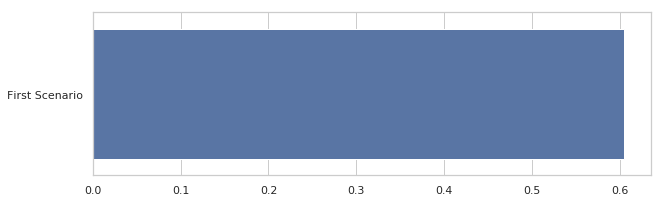

In [38]:
import seaborn as sns


sns.set(rc={'figure.figsize':(10,3)})
sns.set(style="whitegrid")
ax = sns.barplot(x=[test_scores['mean-roc_auc_score']],
                 y=['First Scenario'])
ax.set(xlim=(0, None))


# Changing the most important hyperparameters

In [29]:
params_dict = {"activation": ["relu","sigmoid","tanh"],
               "optimizer": ['RMSprop','adam'],
               "momentum": [.9],
               "dropouts": [.5,0.2],
               "nb_layers": [512],
               "penalty": [0.]
              }

n_features = train_dataset.get_data_shape()[0]

def model_builder(model_params, model_dir):
    model = dc.models.MultitaskClassifier(
    len(sider_tasks), n_features, **model_params)
    return model


In [30]:

metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)
optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_hyperparams, all_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, [], metric)

Fitting model 1/12
hyperparameters: {'activation': 'relu', 'optimizer': 'RMSprop', 'momentum': 0.9, 'dropouts': 0.5, 'nb_layers': 512, 'penalty': 0.0}
computed_metrics: [0.780907668231612, 0.6501650165016502, 0.9295774647887324, 0.6920892494929006, 0.6725838264299803, 0.6443141254462009, 0.7534448818897638, 0.6621148459383753, 0.6267258382642998, 0.7272549019607844, 0.6783594171613601, 0.6367684478371501, 0.7135511191772534, 0.5647931303669009, 0.681057744198597, 0.6666666666666667, 0.6398496240601503, 0.5405709992486852, 0.6924812030075187, 0.6896991330953596, 0.6869116987897803, 0.6593573599652627, 0.655852417302799, 0.6027397260273973, 0.6517476555839727, 0.7419712070874861, 0.5459435230838189]
Model 1/12, Metric mean-roc_auc_score, Validation set 0: 0.673611
	best_validation_score so far: 0.673611
Fitting model 2/12
hyperparameters: {'activation': 'relu', 'optimizer': 'RMSprop', 'momentum': 0.9, 'dropouts': 0.2, 'nb_layers': 512, 'penalty': 0.0}
computed_metrics: [0.765453834115805

computed_metrics: [0.7693661971830986, 0.6537010843941536, 0.8732394366197183, 0.6791075050709938, 0.6896778435239974, 0.65068842427333, 0.7509842519685039, 0.6701680672268908, 0.6338757396449703, 0.7225490196078432, 0.6778197517539126, 0.6234096692111959, 0.7326073805202662, 0.557767369242779, 0.6694549379384781, 0.6668763102725367, 0.6030075187969925, 0.5465815176558978, 0.693734335839599, 0.6764405915349312, 0.6900493052442851, 0.6608771168041685, 0.6685750636132315, 0.6107632093933464, 0.6502557544757033, 0.7342192691029901, 0.5336172120125504]
Model 11/12, Metric mean-roc_auc_score, Validation set 10: 0.669978
	best_validation_score so far: 0.677862
Fitting model 12/12
hyperparameters: {'activation': 'tanh', 'optimizer': 'adam', 'momentum': 0.9, 'dropouts': 0.2, 'nb_layers': 512, 'penalty': 0.0}
computed_metrics: [0.7685837245696401, 0.6595945308816595, 0.971830985915493, 0.6959432048681542, 0.6824457593688363, 0.6453340132585415, 0.7204724409448819, 0.6799719887955182, 0.63239644

In [31]:
#model=model_builder(params_dict,params_dict)
#model.fit(train_dataset,nb_epoch=100)

In [32]:
obj=best_dnn.fit(train_dataset,**params_dict)

In [33]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)

In [34]:
train_scores = best_dnn.evaluate(train_dataset, [metric], transformers)
print(train_scores)


computed_metrics: [0.9586346458537547, 0.9623382138372085, 0.9611160581775008, 0.9632639770766175, 0.9777198504819988, 0.9594567346468488, 0.9883235173263937, 0.9674656275273877, 0.9606899134169361, 0.9711191335740073, 0.9664592032457435, 0.9851216204763116, 0.9712572262142741, 0.9742724745134383, 0.9741534988713318, 0.965288893226625, 0.9883854551424116, 0.9663617886178862, 0.9591478596679709, 0.9682469090089509, 0.9741550923277578, 0.9627416334120855, 0.974178674351585, 0.9622436517383326, 0.9751590504235286, 0.9916729676806453, 0.9638055242582539]
{'mean-roc_auc_score': 0.970102933151696}


In [35]:
valid_scores = best_dnn.evaluate(valid_dataset, [metric], transformers)
print(valid_scores)


computed_metrics: [0.761150234741784, 0.6577086280056577, 0.9295774647887324, 0.7105476673427993, 0.6738987508218277, 0.6356450790413055, 0.7563976377952756, 0.626750700280112, 0.6087278106508875, 0.7415686274509805, 0.6875337290879655, 0.6819338422391857, 0.7090139140955838, 0.5464480874316939, 0.6618996222342148, 0.6742138364779875, 0.6082706766917293, 0.5796393688955672, 0.7032581453634086, 0.6379398266190719, 0.6954280591662931, 0.6658706035605731, 0.6418575063613231, 0.6023483365949119, 0.6476982097186701, 0.7209302325581395, 0.5510981622590767]
{'mean-roc_auc_score': 0.6710131392694355}


In [36]:
test_scores_v1 = best_dnn.evaluate(test_dataset, [metric], transformers)
print(test_scores_v1)

computed_metrics: [0.7138660399529965, 0.5016501650165016, 0.6952380952380952, 0.6450304259634888, 0.6642468239564429, 0.5954088952654232, 0.8270833333333334, 0.48179271708683474, 0.6878081577767816, 0.6306729264475743, 0.5293689320388348, 0.5101851851851852, 0.6249433106575963, 0.5059171597633136, 0.6339233038348082, 0.7255765199161425, 0.583941605839416, 0.5292570677186061, 0.6150051921079958, 0.5979092299847016, 0.6145226355894218, 0.6387320885801129, 0.6798816568047337, 0.6173708920187794, 0.6640735502121642, 0.6676691729323307, 0.5467120181405896]
{'mean-roc_auc_score': 0.6195476704208224}


[(0, 0.6505250539418634)]

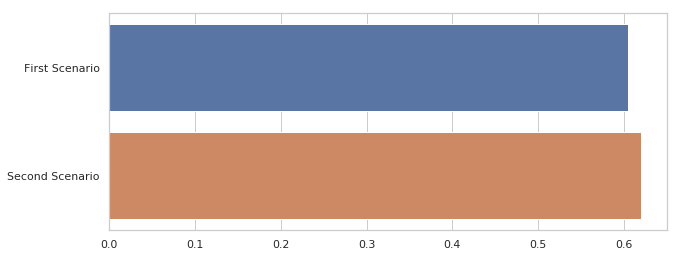

In [37]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,4)})
sns.set(style="whitegrid")
ax = sns.barplot(x=[test_scores['mean-roc_auc_score'],test_scores_v1['mean-roc_auc_score']],
                 y=['First Scenario','Second Scenario'])
ax.set(xlim=(0, None))